# Project Python Foundations: FoodHub Data Analysis

### Daniele Pelizan


### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business. 

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# supressing the warnings
import warnings
warnings.filterwarnings('ignore')

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


#### Observations:

The DataFrame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

### **Question 1:** Write the code to check the shape of the dataset and write your observations based on that.

In [3]:
# shape() is used to understand the shape of the dataset
df.shape

(1898, 9)

**Observations:** 
* The dataset has 1,898 rows and 9 columns.


### Question 2: Write the observations based on the below output from the info() method.

In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [5]:
df.isna().sum() 

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

**Observations:**
* All columns have 1,898 observations, indicating that there are no missing values in any of the columns.
* We re-checked and there are no missing values in the dataset.
* restaurant_name, cuisine_type and day_of_the_week are read as 'object' data type, but should be categorical variables.
* rating is read as 'object' data type, and we will keep it like that until is necessary in the analysis.
* order_id and customer_id are integer. We will keep it like that but we are not going to use it for numeric calculation.
* cost_of_the_order is a float. food_preparation-time and delivery_time are integers. We are going to use this variables as continuous variables.


### Question 3: 'restaurant_name', 'cuisine_type', 'day_of_the_week' are object types. Write the code to convert the mentioned features to 'category' and write your observations on the same. (0.5 mark)

In [6]:
# Converting "objects" to "category" reduces the data space required to store the dataframe
# write the code to convert 'restaurant_name', 'cuisine_type', 'day_of_the_week' into categorical data
df['restaurant_name'] = df.restaurant_name.astype('category')
df['cuisine_type'] = df.cuisine_type.astype('category')
df['day_of_the_week'] = df.day_of_the_week.astype('category')

# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   order_id               1898 non-null   int64   
 1   customer_id            1898 non-null   int64   
 2   restaurant_name        1898 non-null   category
 3   cuisine_type           1898 non-null   category
 4   cost_of_the_order      1898 non-null   float64 
 5   day_of_the_week        1898 non-null   category
 6   rating                 1898 non-null   object  
 7   food_preparation_time  1898 non-null   int64   
 8   delivery_time          1898 non-null   int64   
dtypes: category(3), float64(1), int64(4), object(1)
memory usage: 102.7+ KB


**Observations:**
* There are 5 numeric columns, 3 categorical columns and 1 object type column.


### **Question 4:** Write the code to find the summary statistics and write your observations based on that.

In [7]:
# describe() is used to analyse the quantitative variables
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.0,1.477496e+06,548.049724,1476547.00,1477021.25,1477495.50,1.477970e+06,1478444.00
customer_id,1898.0,1.711685e+05,113698.139743,1311.00,77787.75,128600.00,2.705250e+05,405334.00
cost_of_the_order,1898.0,1.649885e+01,7.483812,4.47,12.08,14.14,2.229750e+01,35.41
food_preparation_time,1898.0,2.737197e+01,4.632481,20.00,23.00,27.00,3.100000e+01,35.00
delivery_time,1898.0,2.416175e+01,4.972637,15.00,20.00,25.00,2.800000e+01,33.00


**Observations:**
* The cost of the order has a big range, going from USD 4,47 to USD 35,41. This could indicate that the FoodHub app don't have a miminum order value and that we have a variety of restaurants with different price levels. 
* The mean of the cost of the order is bigger than the median, indicating a right skew.
* The mean and median for food_preparation_time are very similar, indicating a symmetrical distribution. The difference between the quartiles and the min and max values are very similar as well, inticating this symmetrical distribution.
* The mean of delivery time is a little bit smaller than the median, indicating a left skew.
* The order_id and customer_id are just identification numbers and don't have any statistics significance.


In [8]:
# to analyse the non-numeric variables we use describe(exclude='number')
df.describe(exclude='number').T

,count,unique,top,freq
restaurant_name,1898,178,Shake Shack,219
cuisine_type,1898,14,American,584
day_of_the_week,1898,2,Weekend,1351
rating,1898,4,Not given,736


**Observations:**
* The FoodHub app offers 178 restaurants. The most popular is Shake Shack with the frequency of 219.
* The user can choose from 14 different cuisine types. 
* There are 2 unique categories for the day of the week and 4 categories for rating.

### **Question 5:** How many orders are not rated?

**Observations:**
* There are 736 orders that are not rated. 
* We can find this value in the summary of the non_numeric variables, where the top rating is the 'Not given' with the frequency of 736.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on the distributions of all the relevant variables in the dataset.

### Let's check the numerical variables first

In [9]:
# For numerical variables we want to study the dispersion and central tendency
# For this purpose we are going to plot histograms and box plots
# We are going to create a function that generates the plots
# This function takes the numerical variable as the input


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    
    
    # Using the function fig, ax = plt.subplots() to create 2 subplots
    # The subplots will be on top of each other: nrows = 2
    # The subplots will share the x-axis: sharex = True
    # The first subplot, ax_box2, will have 25% of the figure size: gridspec_kw={'height_ratios':(0.25, 0.75)}
    # The second subplot, ax_hist2, will have 75% of the figure size: gridspec_kw={'height_ratios':(0.25, 0.75)}
    
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows=2, sharex=True, gridspec_kw={"height_ratios": (0.25, 0.75)},  
        figsize=figsize) 
    
    # Creating the boxplot in the first subplot ax_box2, with the mean value displayed as a triangle (showmeans=True)
    sns.boxplot(data=data, x=feature, ax=ax_box2, showmeans=True, color="red")  
    
    # Creating an histogram in the second subplot ax_hist2
    # with an specificied number of bins if it was given in the function
    if bins:
         sns.histplot( data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="blue") 
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color='blue')  
        
    # Add mean to the histogram   
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--", label='Mean')  
    # Add median to the histogram
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-", label='Median')  
    # Add a legend to the histogram and position it outside the plot
    ax_hist2.legend(bbox_to_anchor=(1,1))
   
    

### Observations on Cost of the Order

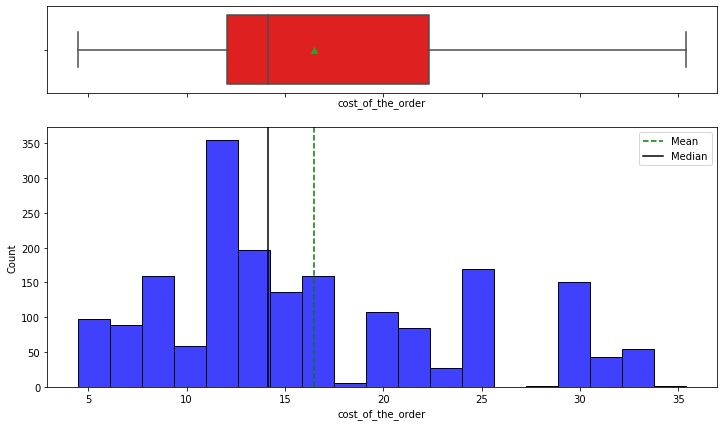

In [10]:
histogram_boxplot(df, 'cost_of_the_order')

**Observations:**
* Cost of the order does not have any outliers.
* The distribution of the cost of the order is right skewed.
* Most of the orders are at the lower end and cost less than USD 17, but we still have a significant number of orders that cost more than USD 17.
* The range between the Second Quartile and First Quartile is small, ranging from USD 12 to USD 14, and 25% of ther orders are in this range. The other orders are spread between bigger ranges. This means that there is a concentration of customers that prefer this range price.
* Half of the orders range from USD 5 to USD 14.
* The other half of the orders have a greater range, going from USD 14 to USD 35.
* A higher cost of the order could represent a most expensive restaurant or an order for two or more people and they are less frequent.


### Observations on Food Preparation Time

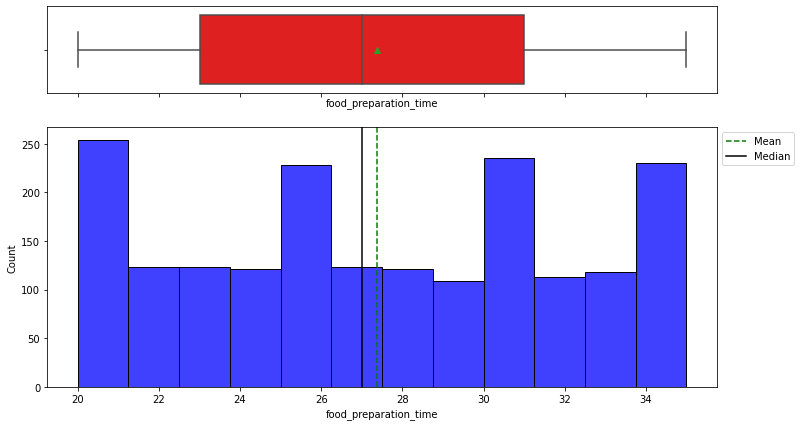

In [11]:
histogram_boxplot(df, 'food_preparation_time')

**Observations:**
* Food preparation time does not have any outliers.
* There are almost the same number of orders for each bin, for each food perparation time.
* The food preparation time ranges from 20 to 35 minutes and the frequencie of the preparation time is almost the same for the entire range.
* The values of the mean and median are almost similar, and the frequencies are distributed almost equaly above and over the second quartile.

### Observations on Delivery Time

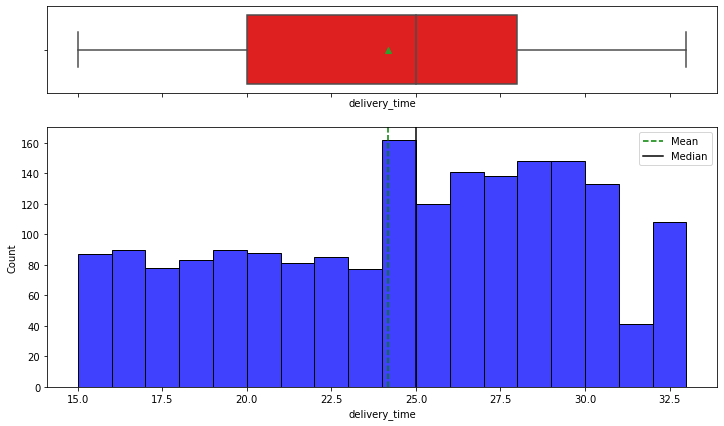

In [12]:
histogram_boxplot(df, 'delivery_time', bins=18)

**Observations:**
* The delivery time does not have outliers.
* The distribution of the delivery time is left skewed.
* We have two sets of data, one with the delivery time ranging from 15 minutes to around 14 minutes and other with the delivery time ranging from around 14 to 33 minutes. This needs further investigation.


### Let's check the categorical variables

In [13]:
# For categorical variables we want to study the number of observations in each category
# For this purpose we are going to plot a bar graph using the countplot function
# We are going to create a function that generates the plots
# This function takes the categorical variable as the input
# The bars will be labeled with the number of observations 
# For the argument perc=True the bar will be labeled with the percentage of observations 
# For the argument n= any integer number, the plot will have the n bars with the biggest number of obervations


def labeled_barplot(data, feature, perc=False, n=None):   
          
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])       # length of the column - number of rows in that column
    count = data[feature].nunique()  # nunique is number of unique values
    
    # Determining the figure size considering the number of bars 
    if n is None:
        plt.figure(figsize=(count + 1, 6))  # count+1 :the number of bars that we have + 1 
    else:
        plt.figure(figsize=(n + 1, 6))      # n+1: number of bars that we want + 1

    plt.xticks(rotation=90, fontsize=15)    # Rotating the x axis labels
    
    # Creating the bar plot with a variable ax assigned to our plot. Then latter we can make manipulatios in this plot.
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n])

    
    # Iterating over the bars one-by-one using the patches function to count the number of bars
    for p in ax.patches:   
        if perc == True:
            label = "{:.1f}%".format( 100 * p.get_height() / total )  # calculating the percentage of each class of the category
        else:
            label = p.get_height()  # count of each class of the category
           
        # Get the x coordinate of the text by getting the width of the bar in which we are going to put our label   
        x = p.get_x() + p.get_width() / 2  
                
        # Get the y coordinate of the text by getting the height of the bar
        y = p.get_height() 
                
        # Writing our label in the x,y coordinates over the bar, 
        # and leave some space between the label and the boundary of the bar (xytext)
        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  

    plt.show()  # Show the plot

### Observations on Restaurant Name

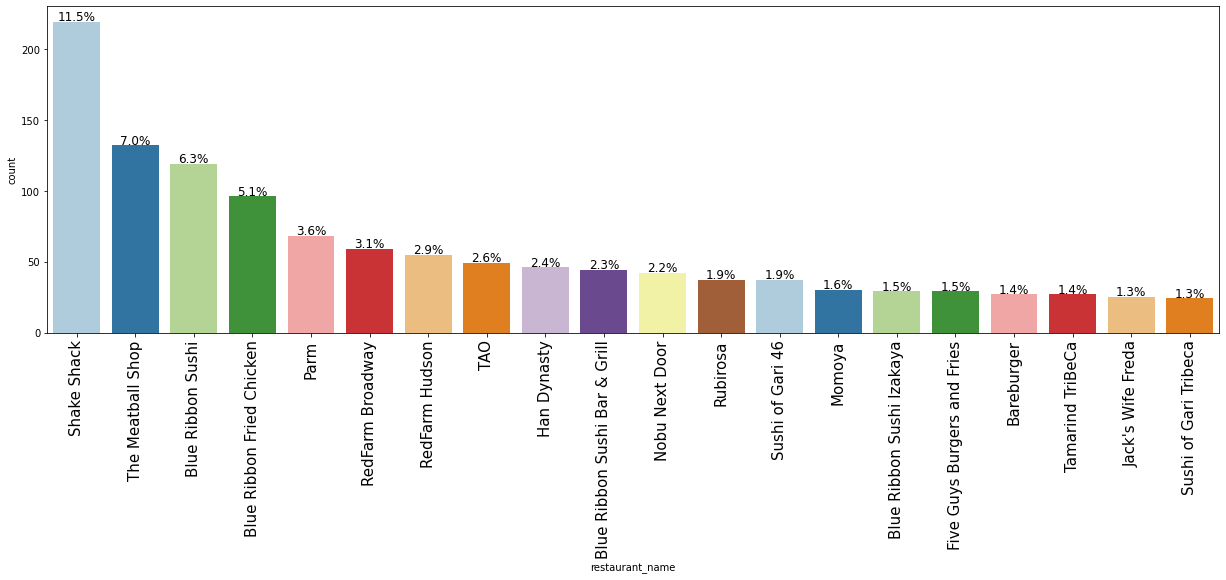

In [14]:
labeled_barplot(df, 'restaurant_name', n=20, perc=True)

**Observations:**
* As we saw in the describe function, we have 178 restaurantes. It's a big number of restaurants to fit in our graphic. We chose to plot only the 20 restaurants with the highest number of observations. 
* The Shake Shack is the most popular restaurant, with 11,5% of the number of orders.

### Observations on Cuisine Type

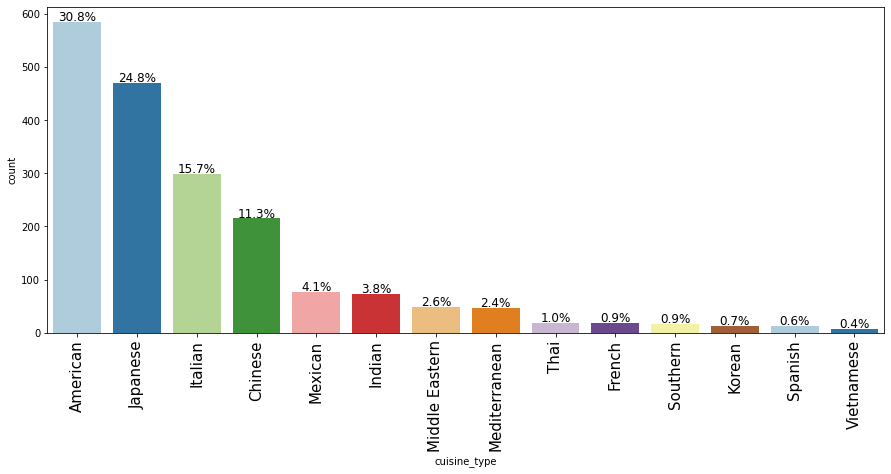

In [15]:
labeled_barplot(df, 'cuisine_type', perc=True)

**Observations:**
* Of all types of cuisine, the American is the favorite, with 30.8% of orders.
* The Japanese cuisine appears in second place with 24.8% of the orders.
* The Italian cuisine appears in third place with 15.7% of the orders.
* The FoodHub app should ensure that it has a varity of restaurants in the American, Japanse, Italian and Chinese cuisine.
* It will be interensting to observe if the order price has influence over the cuisine's choice.
* An additional analysis on revenue is needed to understand where focusing to grow.

### Observations on Day of the Week

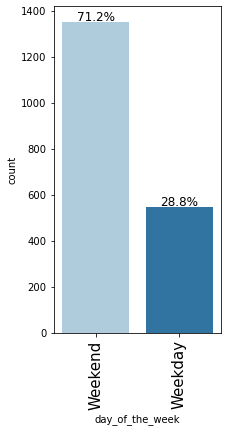

In [16]:
labeled_barplot(df, 'day_of_the_week', perc=True)

**Observations:**
* Around 70% of the orders are made during the weekend, on Saturdays and Sundays.
* Delivery drivers availability must be ensured during the weekend. 
* The FoodHub app operability must be ensured during the weekend.

### Observations on Rating

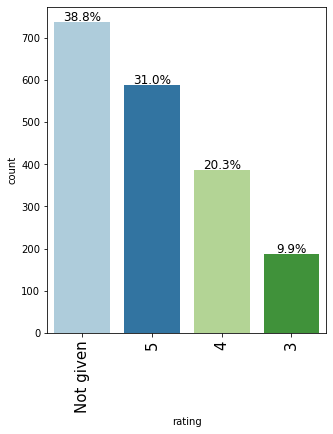

In [17]:
labeled_barplot(df, 'rating', perc=True)

**Observations:**
* The customers did not rate almost 39% of the orders.
* 31% of the orders were rated with 5 stars, while around 20% of the orders were given 4 stars and only around 10% of the orders were given 3 stars.
* The customres rated the order with 3, 4 or 5 stars, or they did not rate. The customers did not rate any order with 1 star or 2 stars.
* In general the orders received a good rating.
* To increase the number of ratings FoodHub could give a discount in the next order to the customers who answer the satisfaction survey.

### Question 7: Write the code to find the top 5 restaurants that have received the highest number of orders.

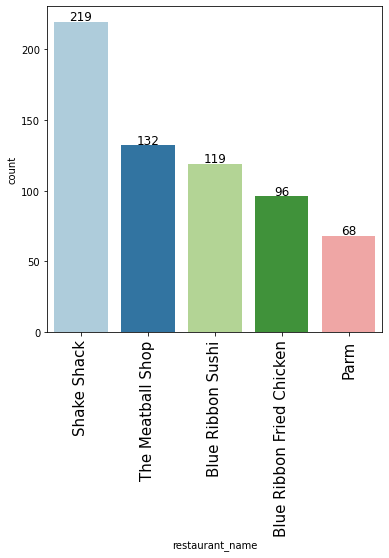

In [18]:
# we can use de definde function labeled_barplot and choose n=5 to plot the top restaurants.

labeled_barplot(df, 'restaurant_name', n=5)


#### Observations:
* The Shake Shack received the highest number of orders, and its number of orders it's almost the double of the orders received by The Meatball Shop.
* The Meatball Shop and the Blue Ribbon Sushi received almost the same number of orders.

### Question 8: Write the code to find the most popular cuisine on weekends.

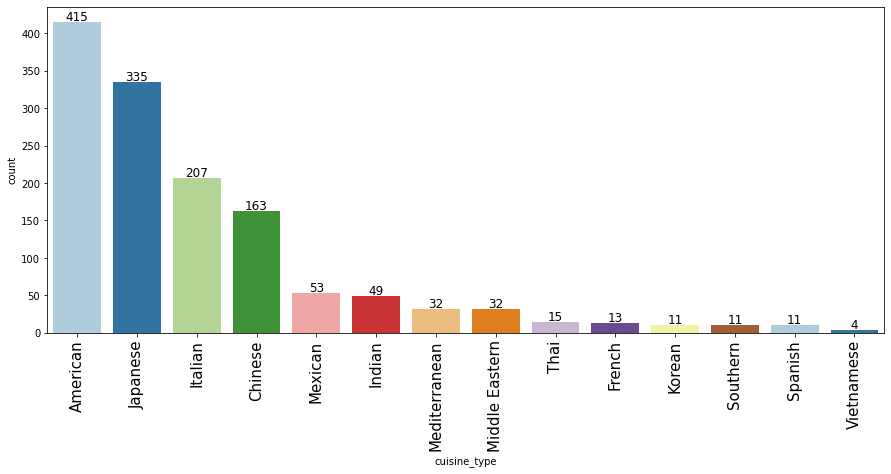

In [19]:
# Creating a new data frame with only the weekends values 
df_weekends = df[df['day_of_the_week']=='Weekend']
# Using the defined function labeled_barplot (that has the countplot function to count the values)
labeled_barplot(df_weekends, 'cuisine_type')

#### Observations:
* The most popular cuisine type during the weekends is the American.
* FoodHub should ensure that America, Japanese, Italian and Chinese cuisine are available in its app and that FoodHub has a great variety of this cuisine.


### Question 9: Write the code to find the number of total orders where the cost is above 20 dollars. What is the percentage of such orders in the dataset?

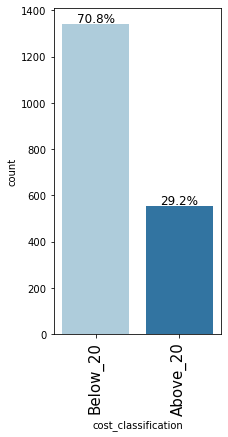

In [20]:
# Create a new column in our dataframe with a cost segregation.
# Create a new dataframe to insert this column.
# I know from the describe() function that the maximum value of the cost_of_the_order is 35.41.
# Using the cut() function create two groups, Below_20: 0 to 20 dollars and Above_20: 20 to 40 dollars 

df['cost_classification'] = pd.cut(df.cost_of_the_order, bins=(0,20,40), labels = ('Below_20', 'Above_20'))

labeled_barplot(df, 'cost_classification', perc=True)

#### Observations:
* Around 70% of the orders cost below 20 dollars.
* FoodHub should ensure that is available in its app a variety of restauranst wiht a menu that allows an order price lower than \\$ 20.

### Question 10: Write the code to find the mean delivery time based on this dataset.

In [21]:
df.delivery_time.mean()

24.161749209694417

**Observations:**
* The average delivery time for this dataset is 24 minutes.

### Question 11: Suppose the company has decided to give a free coupon of 15 dollars to the customer who has spent the maximum amount on a single order. Write the code to find the ID of the customer along with the order details.

In [22]:
df[df.cost_of_the_order==df.cost_of_the_order.max()]

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cost_classification
573,1477814,62359,Pylos,Mediterranean,35.41,Weekday,4,21,29,Above_20


#### Observations:
* The customer 62359 payed 35.41 dollars when he ordered from Pylos Restaurant, a mediterranean cuisine restaurant. It was during the weekday, and the customer gave a 4 rating. This was the most expensive order in our dataset.
* The customer 62359 is the lucky one who is going to receive a 15 dollars coupon.

### Bivariate Analysis

### Question 12: Perform bivariate analysis to explore relationships between the important variables in the dataset.


## Correlation between the numerical variables

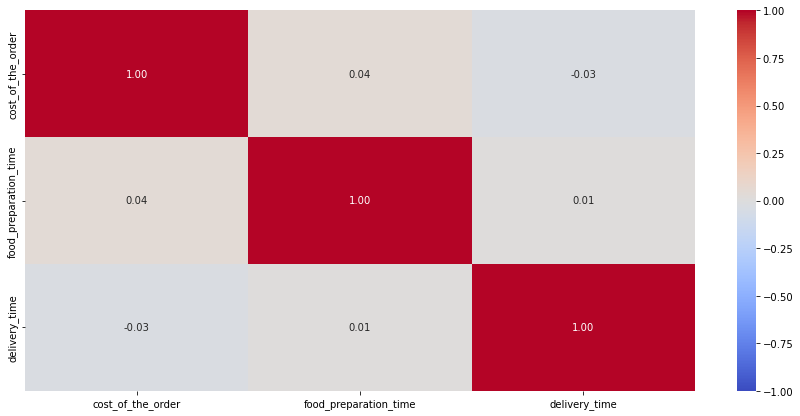

In [23]:
# For numerical variables, we want to study the correlation between the variables using the corr() fuction.
# For easy visualization, we plot the correlations in a heatmap.

# Check for correlation among numerical variables
num_var = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']

corr = df[num_var].corr()

# Plot the heatmap to visualize the correlation
plt.figure(figsize=(15, 7))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, fmt='.2f', cmap='coolwarm', xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()

**Observations:**
* There is no correlation between the cost of the order, the food preparation time or the delivery time.
* It would be expected to find a correlation between the food preparation time and cost of the order (cost of the order would increase with the increase of the food preparation time), but this was not found in the analysis.

### Bivariate Scattler Plots - correlation between numerical variables

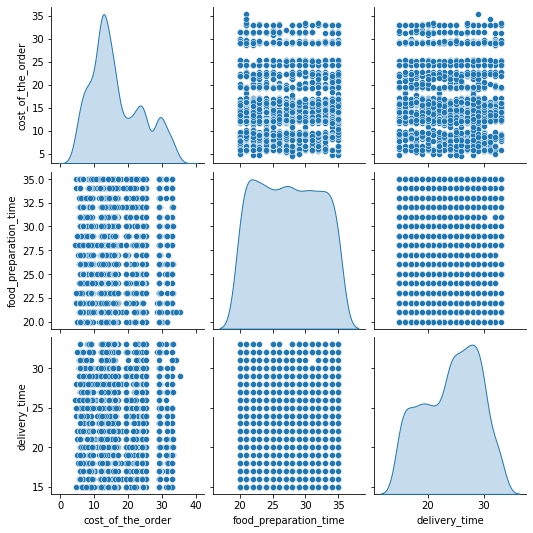

In [24]:
# Another way to check the correlation anomng numerical variables is ploting a pairplot
sns.pairplot(data=df[num_var], diag_kind='kde')

**Observations:**
* As already observed in the heatmap, there is no correlation between the cost of the order, the food preparation time or the delivery time.

## Relationship between the numerical and categorical variables

In [25]:
# We wanto to study how the numerical variable behaves in each class of the categorical variable.
# We use the barplot() for this purpose. 
# We use the barplot with the mean or sum of the the numerical variable in this analysis.

# Let's create a function to plot our barplot()
# This function takes the categorical and numerical variable as the input
# For the argument n= any integer number, the plot will have the n bars with the biggest number of obervations


def numcat_barplot (data, cat, num, estimator, hue=None, perc=False, n=None):
          
    """
    Barplot 

    data: dataframe
    cat: categorical variable
    num: numerical variable
    estimator: statistical fuction, sum or np.mean in this function
    hue: categorigal variable
    perc: whether to display percentages instead of number (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
        
    count = data[cat].nunique()  # nunique is number of unique values
    
    # Determining the figure size considering the number of bars 
    if n is None:
        plt.figure(figsize=(count + 1, 6))  # count+1 :the number of bars that we have + 1 
    else:
        plt.figure(figsize=( n + 1, 6))      # n+1: number of bars that we want + 1
        
    plt.xticks(rotation=90, fontsize=15)

    # Creating the bar plot with a variable ax assigned to our plot. Then latter we can make manipulatios in this plot.
    
    if estimator == sum:
        ax=sns.barplot(data=data, x=cat, y=num, ci=None, estimator=estimator,
                       order=data.groupby(cat)[num].sum().sort_values(ascending=False).index[:n], palette='Paired', hue=hue)
    else:
         ax=sns.barplot(data=data, x=cat, y=num, ci=None, estimator=estimator,
                       order=data.groupby(cat)[num].mean().sort_values(ascending=False).index[:n], palette='Paired', hue=hue)
    
    # total is the total amount of the numeric variable, the sum of each class of the category
    total=0
    for p in ax.patches: 
        total=total+p.get_height()
        
    # Iterating over the bars one-by-one using the patches function to count the number of bars 
    for p in ax.patches: 
        if perc == True:
            label = "{:.1f}%".format( 100 * p.get_height() / total )  # calculating the percentage of each class of the category
        else:
            label = "{:.1f}".format(p.get_height())  # count of each class of the category
           
        # Get the x coordinate of the text by getting the width of the bar in which we are going to put our label   
        x = p.get_x() + p.get_width() / 2  
                
        # Get the y coordinate of the text by getting the height of the bar
        y = p.get_height() 
                
        # Writing our label in the x,y coordinates over the bar, 
        # and leave some space between the label and the boundary of the bar (xytext)
        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  

    # Add a legend and position it outside the plot
    ax.legend(bbox_to_anchor=(1,1))        
        
    plt.show()  # Show the plot


### Cost of the order and Cuisine type

No handles with labels found to put in legend.


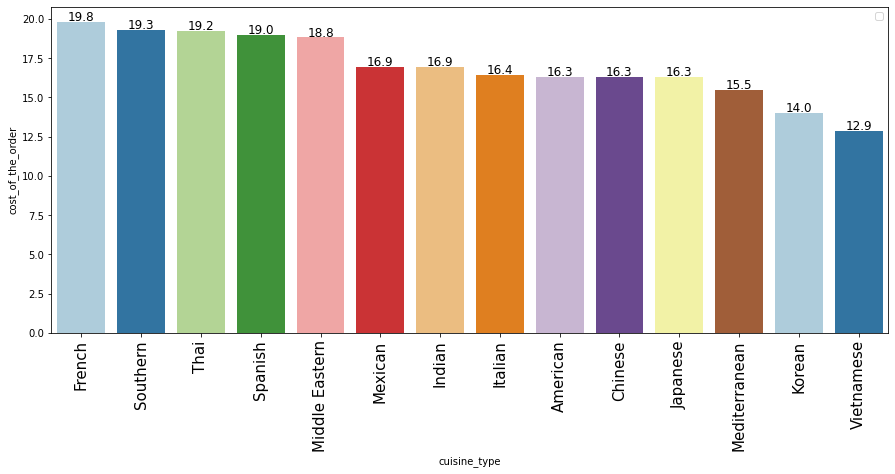

In [26]:
# We use the defined function numcat_barplot with the mean of the the numerical variable.

numcat_barplot(data=df, cat='cuisine_type', num ='cost_of_the_order', estimator=np.mean)

**Observations:**
* The most expensive cuisine is the French, folowed by the Southern and Thai.
* The less expensive cuisine is the Vietnamese, folowed by the Korean and Mediterranean.
* As we saw that the medium cost of an order is USD 16, the cuisines that have this magnitude of average cost of the order are the Mexican, Indian, Italian, American, Chinese and Japanese.
* The app should have a big selection of Mexican, Indian, Italian, American, Chinese and Japanese.

No handles with labels found to put in legend.


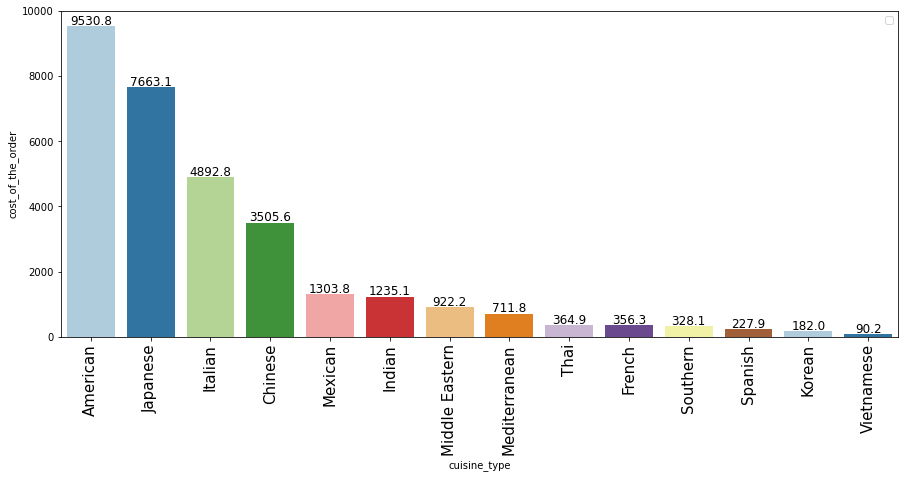

In [27]:
# We can study the total value cost of the orders for each cuisine type, 
# which will give us an ideia on where the FoodHub revenue is coming from.
# We use the defined fuction numcat_barplot with the estimator=sum.

numcat_barplot(data=df, cat='cuisine_type', num ='cost_of_the_order', estimator=sum)

**Observations:**
* The cuisine that generates the highest revenue for the FoodHub is the American, folowed by the Japanese, Italian and Chinese. This classification is the same as the number of orders for each cuisine. 
* The American cuisine generates almost two times the revenue of the Italian cuisine.
* More analysis can be done for each of this high revenue cuisines to to decide which of this cuisine to focus on and to check the restaurant selection.
* Despite the French cuisine having the high average cost of the order, it generates a low revenue because the number of the orders are low. The same is true for the Southern, Thai and Spanish cuisine.
* FoodHub can do a marketing campaing targeting the consumers of the French, Southern, Thai and Spanish cuisine to improve the number of the orders and increase the revenue. More analysis can be done to decide which of this cuisine to focus on.

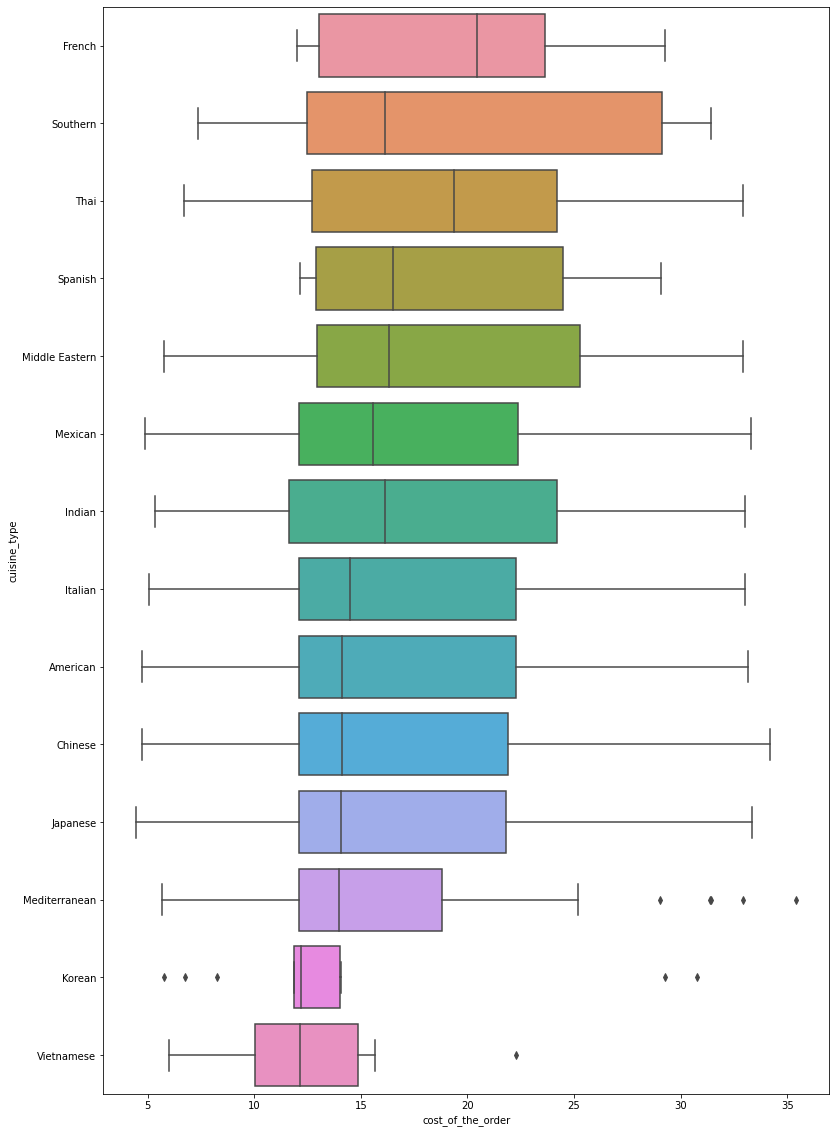

In [28]:
# Let's analyse the American, Japanese, Italian and Chinese cuisine to decide which one could be a focus for improvment.
# Let's analyse the French, Southern, Thai and Spanish cuisine to decide which one could be a focus for improvment.
# We want to see how the cost of the order is distributed in the cuisine type, using the boxplot()

plt.figure(figsize=(13,20))

sns.boxplot(data=df, x='cost_of_the_order', y='cuisine_type', 
            order=df.groupby('cuisine_type').cost_of_the_order.mean().sort_values(ascending=False).index )

plt.show()

**Observations:**
* The American, Japanse, Italian and Chinese cuisine have almost the same distribuition for the cost of the order. The Second Quartile is more concentrate (small range), with customers paying between USD 12 and USD 14 for an order. More analysis can be done to study the number of restaurants that FoodHub has in this category and the total of the cost of order that each one has received.
* The Frech and Thai cuisine have a median cost of the order that is high than the Southern and Spanish cuisine, and have a Third Quartile cost of the order that is more concentrate (small range) than the Southern and Spanish cuisine. 
* FoodHub could do a marketing campaing that focus on the Third Quartile consumers of the French and Thai cuisine to improve the number os the orders and increace the revenue. This campaing should target the high income customers. More analysis can be done to study the number of restaurants that FoodHub has in this category and the total of the cost of the order that each one has received.

### Cost of the order by Cuisine type and Restaurant

In [29]:
# Let's create a defined function that generates a dataframe for each type of cuisine

def df_cuisine (cuisine):
    """"
    cuisine: the type of cuisine to filter
    """
   
    df_c = df[df['cuisine_type']== cuisine]
    # 'restaurant_name' is a category, so while manipulating it we need to remove the unused values
    df_c.loc[:,'restaurant_name'] = df_c.loc[:,'restaurant_name'].cat.remove_unused_categories()
    return df_c

No handles with labels found to put in legend.


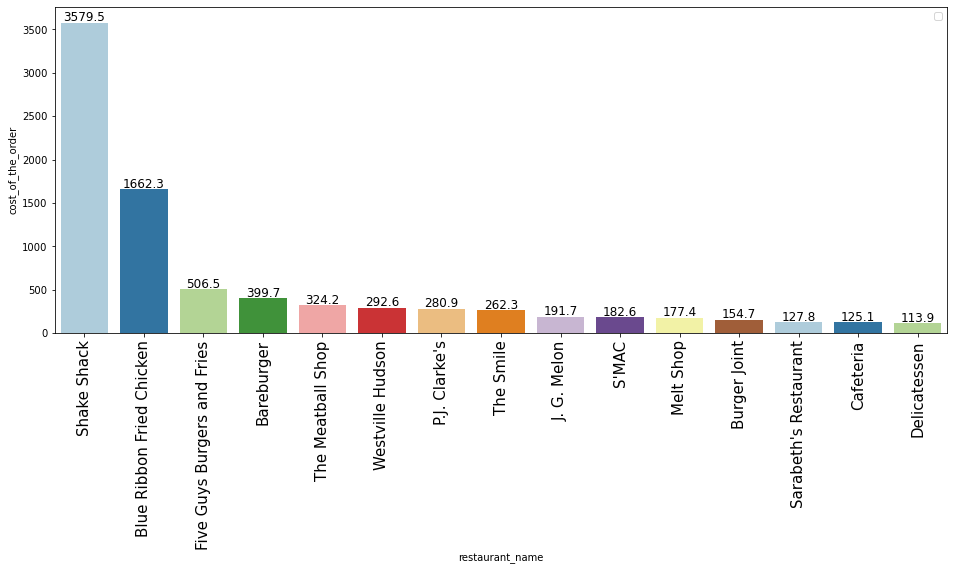

In [30]:
# Let's study which restaurants FoodHub has in the American cuisine and the sum of the cost of the order for each
# We use the defined fuction df_cuisine
# We use the defined fuction numcat_barplot with the estimator=sum.
# The American cuisine has 41 restaurants registereds in the FoodHub. Let's focus on the 15 wiht biggest revenue.

numcat_barplot(data=df_cuisine('American'), cat='restaurant_name', num ='cost_of_the_order', estimator=sum, n=15)

**Observations:**
* FoodHub has a big number of American restaurants, 41 in total. The plot shows the 15 restaurants with the highest revenue. 
* In the country the American cuisine has a huge number of restaurant chains, and FoodHub should include in its options other famous and polular restaurants to reflect this reality, to atract new customers and to increase the options to the existing customers.
* The Shake Skack is the restaurant with the highest revenue.
* FoodHub should add food chains with similar type of food as the Shake Shack and Blue Ribbon Fried Chicken, to add more options and atract new costumers.


No handles with labels found to put in legend.


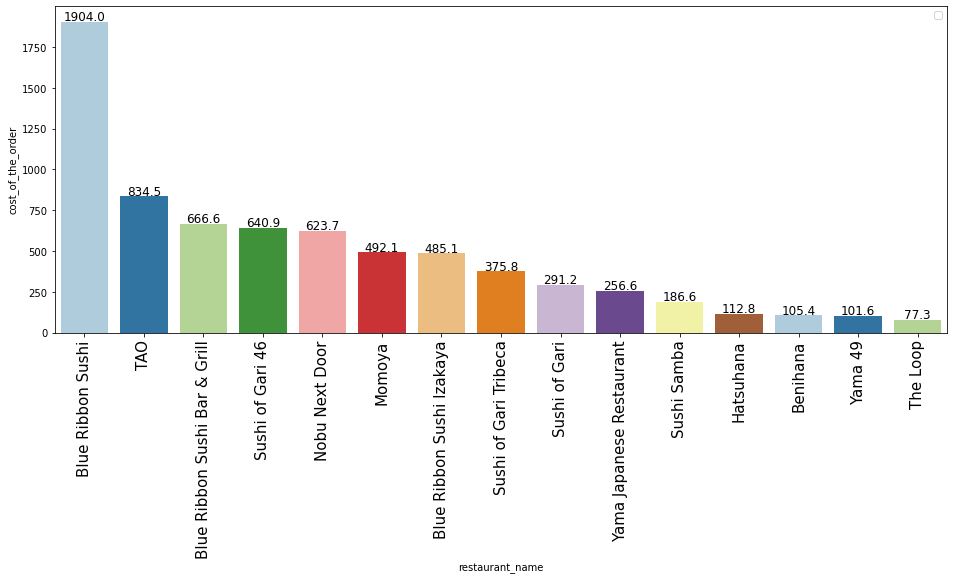

In [31]:
# Let's study which restaurants FoodHub has in the Japanse cuisine and the sum of the cost of the orders for each
# We use the defined fuction df_cuisine
# We use the defined fuction numcat_barplot with the estimator=sum.
# The Japanse cuisine has 29 restaurants registered in the FoodHub. Let's focus on the 15 wiht biggest revenue.

numcat_barplot(data=df_cuisine('Japanese'), cat='restaurant_name', num ='cost_of_the_order', estimator=sum, n=15)


**Observations:**
* FoodHub has a big number of Japanese restaurants, 29 in total. The plot shows the 15 restaurants with the highest revenue. 
* The Blue Ribbon Sushi is the restaurant with the highest revenue. 
* FoodHub should add the restaurants with similar type of food as the Blue Ribbon Sushi and TAO restaurants, to add more options and to atract new costumers.

No handles with labels found to put in legend.


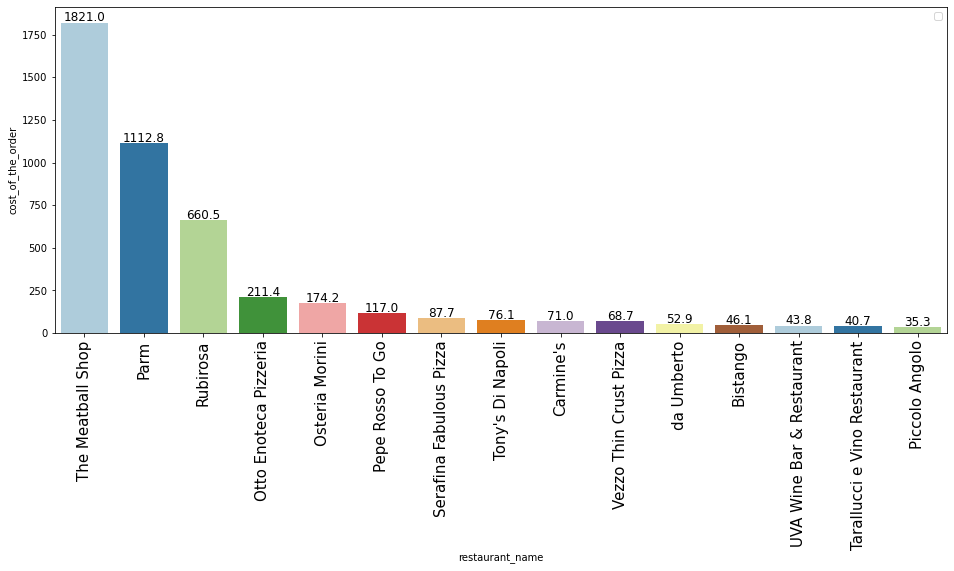

In [32]:
# Let's study which restaurants FoodHub has in the Italian cuisine and the sum of the cost of the orders for each
# We use the defined fuction df_cuisine
# We use the defined fuction numcat_barplot with the estimator=sum.
# The Italian cuisine has 31 restaurants registereds in the FoodHub. Let's focus on the 15 wiht most orders.

numcat_barplot(data=df_cuisine('Italian'), cat='restaurant_name', num ='cost_of_the_order', estimator=sum, n=15)


**Observations:**
* FoodHub has a big number of Italian restaurants, 31 in total. The plot shows the 15 restaurants with the highest revenue.
* The Meatball Shop is the restaurant with the highest revenue. 
* FoodHub should add the restaurants with similar type of food as the The Meatball Shop and the Pam restaurant, to add more options and to attract new customers.

No handles with labels found to put in legend.


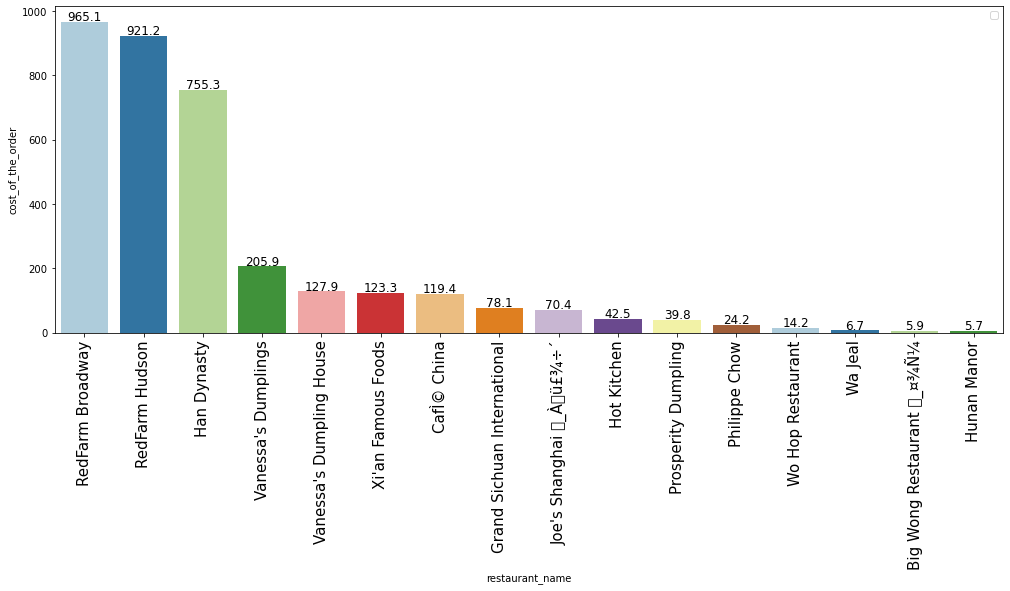

In [33]:
# Let's study which restaurants FoodHub has in the Chinese cuisine and the sum of the cost of the orders for each
# We use the defined fuction df_cuisine
# We use the defined fuction numcat_barplot with the estimator=sum.

numcat_barplot(data=df_cuisine('Chinese'), cat='restaurant_name', num ='cost_of_the_order', estimator=sum)


**Observations:**
* FoodHub has a big number of Chinese restaurants.
* The RedFarm is the restaurant with the highest revenue. 
* FoodHub should add the restaurants with similar type of food as the RedFarm and Han restaurants, to add more options and to attract new customers.

No handles with labels found to put in legend.


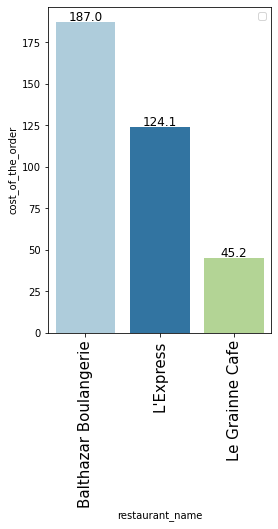

In [34]:
# Let's study which restaurants FoodHub has in the French cuisine and the sum of the cost of the orders for each
# We use the defined fuction df_cuisine
# We use the defined fuction numcat_barplot with the estimator=sum.

numcat_barplot(data=df_cuisine('French'), cat='restaurant_name', num ='cost_of_the_order', estimator=sum)


**Observations:**
* FoodHub has only 3 restaurants in the French cuisine.
* Normally it does not have a great quantity of Frech restaurants compared with the other cuisines.
* FoodHub should do a study to verify what is the percentage of French restaurants in the region, and add more French restaurants if necessary to reflect this percentage in its app.

No handles with labels found to put in legend.


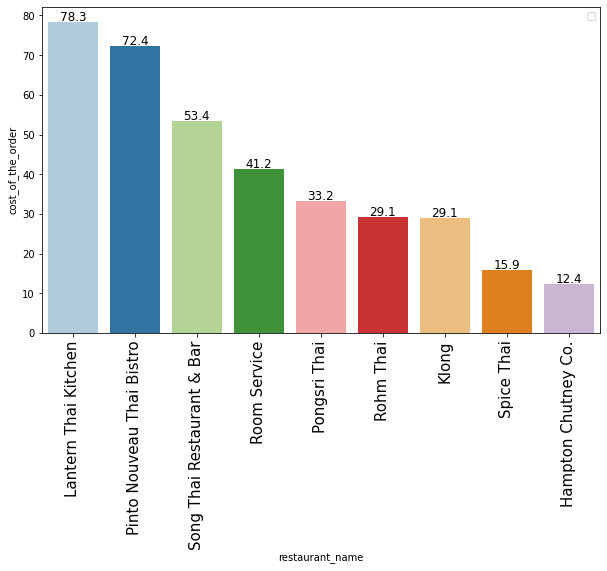

In [35]:
# Let's study which restaurants FoodHub has in the Thai cuisine and the sum of the cost of the orders for each
# We use the defined fuction df_cuisine
# We use the defined fuction numcat_barplot with the estimator=sum.

numcat_barplot(data=df_cuisine('Thai'), cat='restaurant_name', num ='cost_of_the_order', estimator=sum)

**Observations:**
* FoodHub already a number of Thai restaurants bigger than than the French restaurants. FoodHub shoud do a study to verify the percentage of restaurants in each cuisine type, in the region that he offers its services. This should clarify if the amount of Thai restaurants is adequate for the region and if it should exist more Thai restaurants in its app than French.

### Cost of the order by cuisine type and day of the week

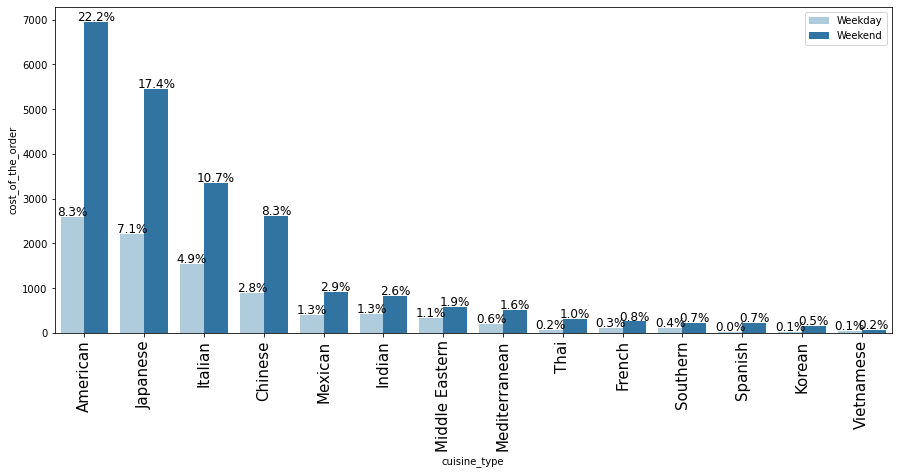

In [36]:
# Let's study the revenue for each cuisine type by the day of the week
# We use the defined fuction numcat_barplot with the estimator=sum and hue=day_of_the_week.

numcat_barplot(data=df, cat='cuisine_type', num ='cost_of_the_order', estimator=sum, hue='day_of_the_week', perc=True)


**Observations:**
* The revenue for each cuisine type is higher during the weekend.
* The revenue for each cuisine follows almost the same pattern for weekend and weekday.
* The preferences for the type of cuisine are the same during the weekday as the weekend, with the American bringing the highest revenue, folowed by the Japanese, Italian and Chinese.
* The Spanish and Korean cuisine have almost all of their revenue during the weekend.

### Food preparation time by cuisine type and day of the week

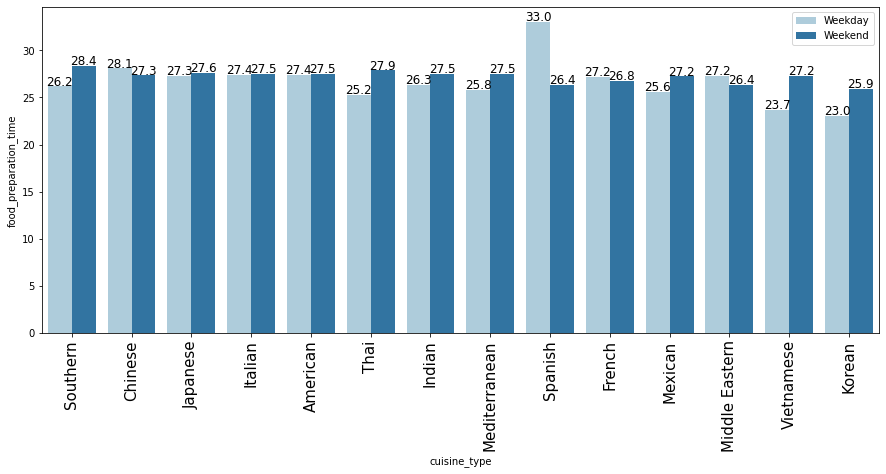

In [37]:
# Let's study the preparation time for each cuisine type by the day of the week
# We use the defined fuction numcat_barplot with the estimator=np.mean and hue=day_of_the_week.

numcat_barplot(data=df, cat='cuisine_type', num ='food_preparation_time', estimator=np.mean, hue='day_of_the_week')

**Observations:**
* Almost all of the cuisines have the same food preparation time, when compared with each other and with the day of the week.
* The Spanish cuisine has a highest food preparation time during week. This could be because they have a small number of the orders during the week and the average number don't reflect the reality. 

### Delivery time by cuisine type and day of the week

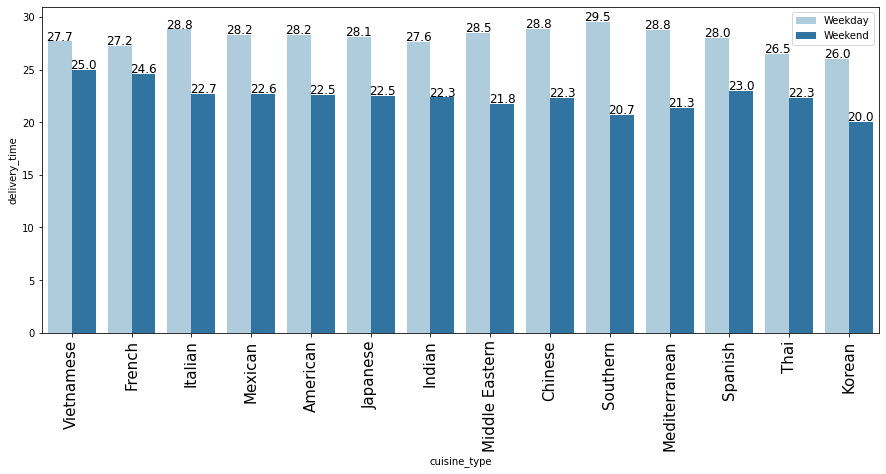

In [38]:
# Let's study the delivery time for each cuisine type by the day of the week
# We use the defined fuction numcat_barplot with the estimator=np.mean and hue=day_of_the_week.

numcat_barplot(data=df, cat='cuisine_type', num ='delivery_time', estimator=np.mean, hue='day_of_the_week')

**Observations:**
* Almost all of the cuisines have a similar delivery time, when compared to each other. 
* The delivery time is higher during the week for all cuisine types, around 28 minutes.
* During que weekend the deliveries are faster than during the weekday, around 22 minutes. This could be because the car traffic is heavy during the weekday or because there are not enough delivery drivers during the weekday.
* FoodHub should guarantee that there is an adequate number of delivery drivers during the weekday and that the drivers know how to avoid the heavy car traffic.

### Cost of the order by customer id and day of the week

In [39]:
# Check how many customers FoodHub has
df.customer_id.nunique()

1200

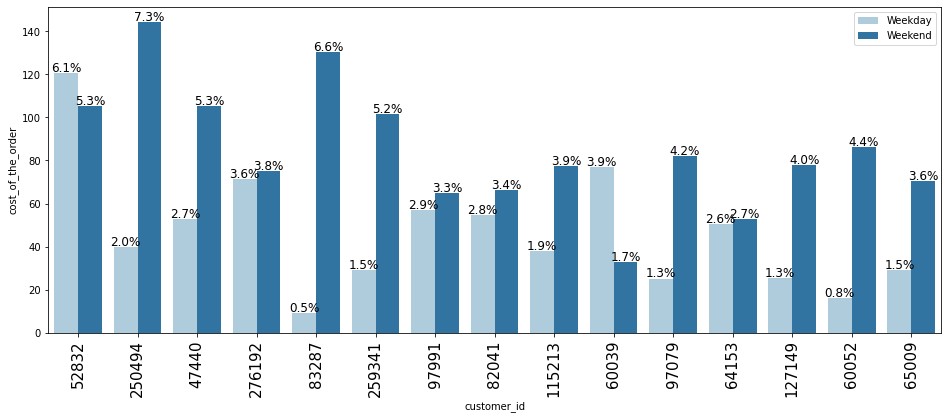

In [40]:
# Let's study the cost of the order for each customer by the day of the week
# We use the defined fuction numcat_barplot with the estimator=sum and hue=day_of_the_week.
#The dataset has 1200 customers. Let's analyse 15 of them. 

numcat_barplot(data=df, cat='customer_id', num ='cost_of_the_order', estimator=sum,n=15, hue='day_of_the_week', perc=True)

**Observations:**
* As seen in the plot day of the week and number of orders, it is known that the majority of the orders are made during the weekend, and in the chart above it can be observed that the majority of the custormers follow this pattern, but for some of them the difference between the total cost of the order between the weekday and weekend is small. FoodHub should study the demographics to understand who are this customers and try to attract more of this customers to bring balance in the number of the orders.
* A minority of the customers spend more in orders during the weekday. FoodHub should study the demographics of this consumers, to understand who is ordering/spending more during the weeks and try to attract more of this customers if FoodHub wants to increase its revenue during the weekdays.
* A deeper analysis can be done to determine if this customers have a preference for a type of cuisine/restaurant that is different that the general behavior seen so far. 

### Rating and Cuisine type

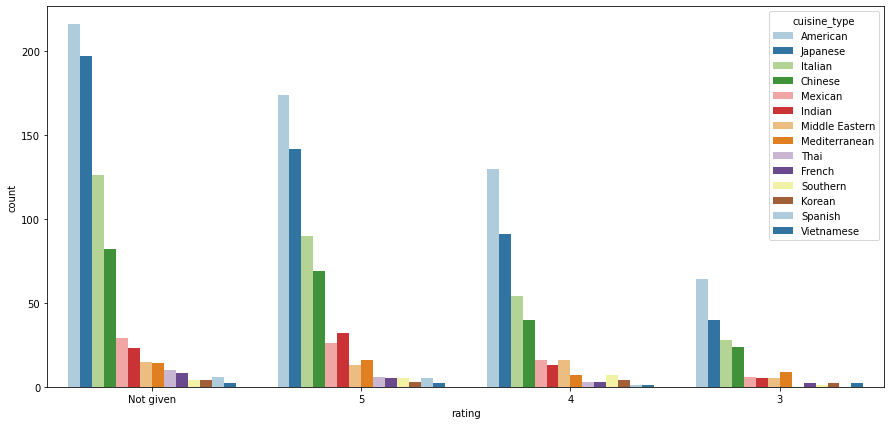

In [41]:
plt.figure(figsize=(15, 7))

sns.countplot(data=df, x='rating', hue='cuisine_type', palette="Paired", order=df.rating.value_counts().index,
             hue_order=df.cuisine_type.value_counts().index)

plt.show()

**Observations:**
* The majority of the cuisines have a big number of 5 stars than 4 star and 3 stars.

### Rating and Cuisine type

In [42]:
# We are going to change the data type of rating from object to integer, to study the average rating per cuisine type
# Replacing the 'Not given' rating by zero, then changing the rating from object to integer
# and replacing the zeros by nan

df['rating'].replace('Not given', 0, inplace=True)
df['rating']=df.rating.astype('int')
df['rating'].replace(0, np.nan, inplace=True)
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,cost_classification
0,1477147,337525,Hangawi,Korean,30.75,Weekend,NaN,25,20,Above_20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,NaN,25,23,Below_20
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5.0,23,28,Below_20
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3.0,25,15,Above_20
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4.0,25,24,Below_20


No handles with labels found to put in legend.


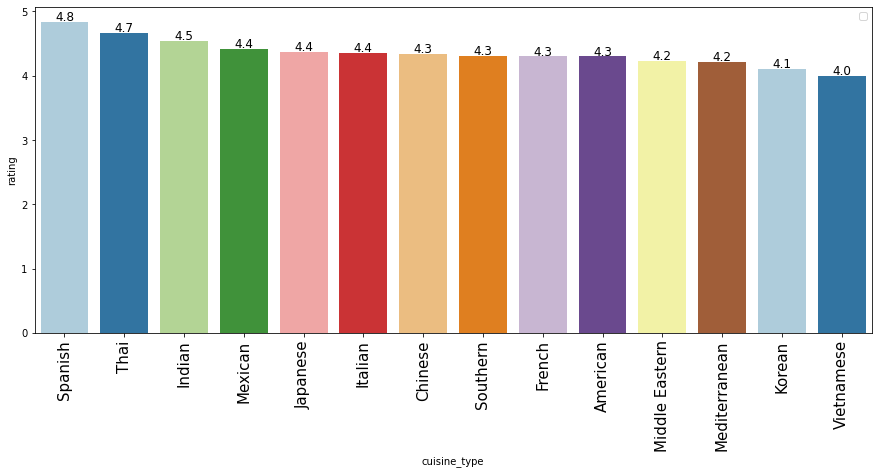

In [43]:
# Let's study the average rating for each cuisine type
# We use the defined fuction numcat_barplot with the estimator=np.mean.

numcat_barplot(data=df, cat='cuisine_type', num ='rating', estimator=np.mean)

**Observations:**
* All of the cuisine types have an average rating greater than 4.
* FoodHub should ask the customers to provide a rate for different aspects, as the delivery time, the cost of the delivery, food quality and so on.

### Rating and 10 popular restaurants

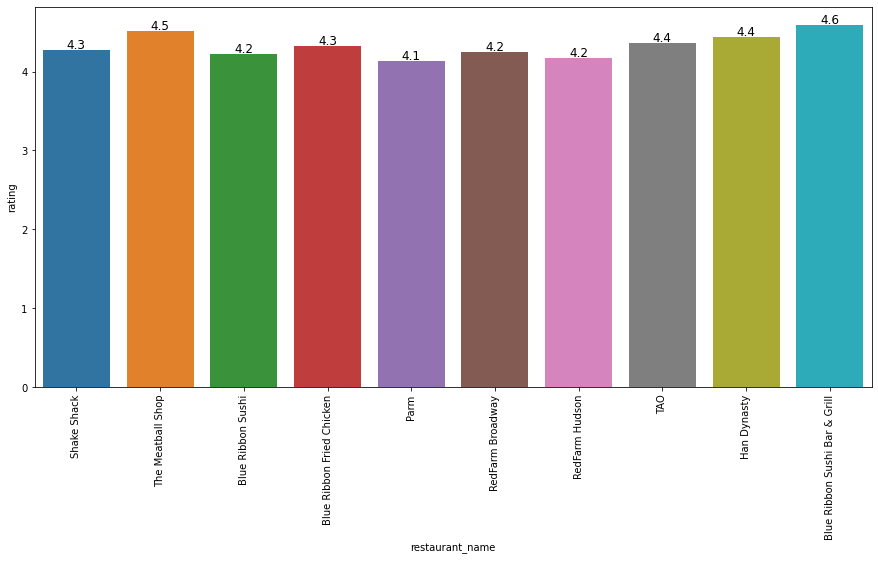

In [44]:
# Let's study the rating for the 10 popular restaurants (more number of orders)
# We use a barplot with the average rating
# We order the the restaurnts by the number of the order, selecting the 10 restaurants with more number of orders
# 

plt.figure(figsize=(15, 7)) # To resize the plot

ax = sns.barplot(data=df, x='restaurant_name', y='rating', ci=None, 
            order=df.groupby('restaurant_name').cost_of_the_order.count().sort_values(ascending=False).index[:10] )

plt.xticks(rotation=90) # To rotate the x axis lables

# Routine to write the rating average on top of each bar:      
# Iterating over the bars one-by-one using the patches function to count the number of bars and get the value of each bar
for p in ax.patches: 
    label = "{:.1f}".format(p.get_height())  # count of each class of the category
    # Get the x coordinate of the text by getting the width of the bar in which we are going to put our label   
    x = p.get_x() + p.get_width() / 2  
    # Get the y coordinate of the text by getting the height of the bar
    y = p.get_height() 
    # Writing our label in the x,y coordinates over the bar, 
    # and leave some space between the label and the boundary of the bar (xytext)
    ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  

plt.show()

**Observations:**
* The 10 popular restaurants have a rating higher than 4.
* The Shake Shake is the most popular and has a rating of 4.3, folowed by The Meatball Shop wiht a rating of 4.5.
* The Blue Ribbon Sushi Bar & Grill has the highest rating, 4.6.
* FoodHub should ask the customers to give ratings for specifics aspects. Thus would be possible to analyse if the customers are rating the food, the delivery, or other aspects, and would be possible to make a plan to improve the rating in this specific aspects.

### Question 13: Suppose the company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Write the code to find the restaurants fulfilling the criteria to get the promotional offer.

In [45]:
# Finding the count of ratings for each restaurant using groupby() and count()
rating_count = df.groupby('restaurant_name').rating.count().reset_index()
rating_count

,restaurant_name,rating
0,'wichcraft,1
1,12 Chairs,2
2,5 Napkin Burger,2
3,67 Burger,1
4,Alidoro,0
...,...,...
173,Zero Otto Nove,1
174,brgr,1
175,da Umberto,1
176,ilili Restaurant,13


In [46]:
# Extracting the restaurants tha have more than 50 ratings
restaurant_50=rating_count[rating_count['rating'] > 50].restaurant_name
restaurant_50

20     Blue Ribbon Fried Chicken
21             Blue Ribbon Sushi
136                  Shake Shack
153            The Meatball Shop
Name: restaurant_name, dtype: category
Categories (178, object): [''wichcraft', '12 Chairs', '5 Napkin Burger', '67 Burger', ..., 'brgr', 'da Umberto', 'ilili Restaurant', 'indikitch']

In [47]:
# Finding average ratings for each restaurant and sorting them out in descending order
# using groupby() and sort_values() on df3 dataframe
avg_rating = df.groupby('restaurant_name').rating.mean().sort_values(ascending=False).reset_index()
avg_rating

,restaurant_name,rating
0,'wichcraft,5.0
1,Ravagh Persian Grill,5.0
2,Chola Eclectic Indian Cuisine,5.0
3,Chote Nawab,5.0
4,Junoon,5.0
...,...,...
173,Rohm Thai,NaN
174,Room Service,NaN
175,Spice Thai,NaN
176,Tarallucci e Vino Restaurant,NaN


In [48]:
# Extracting restaurant names that have more than 50 ratings using restaurant name in restaurant_100 and isin() function
avg_rating[avg_rating['restaurant_name'].isin(restaurant_50)]

,restaurant_name,rating
66,The Meatball Shop,4.511905
89,Blue Ribbon Fried Chicken,4.328125
93,Shake Shack,4.278195
101,Blue Ribbon Sushi,4.219178


**Observations:**
* The restaurants that have more than 50 ratings with an average rating greater than 4 are the The Meatball Shop, Blue Ribbon Fried Chicken, Shake Shack and Blue Ribbon Sushi. This restaurants will get the promotional offer in the advertisement.

### Question 14: Suppose the company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Write the code to find the net revenue generated on all the orders given in the dataset.

In [49]:
Revenue25 = sum([cost*0.25 for cost in df['cost_of_the_order'] if cost >= 20])
Revenue25

3688.7275000000027

In [50]:
Revenue15=sum([cost*0.15 for cost in df['cost_of_the_order'] if cost > 5 and cost < 20])
Revenue15

2477.5755000000036

In [51]:
Net_revenue = Revenue25 + Revenue15
print(Net_revenue)

6166.303000000006


**Observations:**
* The net revenue generated on all the orders is \\$ 6,166.30

### Question 15: Suppose the company wants to analyze the total time required to deliver the food. Write the code to find out the percentage of orders that have more than 60 minutes of total delivery time.

Note: The total delivery time is the summation of the food preparation time and delivery time. 

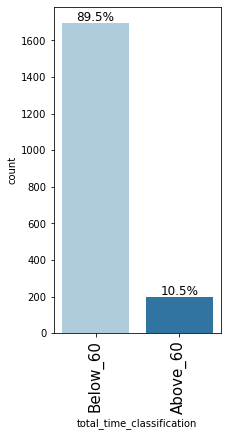

In [52]:
df['total_time'] = df.food_preparation_time + df.delivery_time
df['total_time_classification'] = pd.cut(df.total_time, bins=(0,60,200), labels = ('Below_60', 'Above_60'))
labeled_barplot(df, 'total_time_classification', perc=True)

**Observations:**
* 10.5% of the orders have more than 60 minutes of total delivery time.


### Question 16: Suppose the company wants to analyze the delivery time of the orders on weekdays and weekends. Write the code to find the mean delivery time on weekdays and weekends. Write your observations on the results.

In [53]:
df.groupby('day_of_the_week').delivery_time.mean()

day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

**Observations:**
* The average delivery time during the weekday is 28 minutes.
* The average delivery time during the weekend is 22 minutes.
* During que weekend the deliveries are faster than during the weekday. This could be because the car traffic is heavy during the weekday or because there are no enough delivery drivers during the weekday.
* FoodHub should guarantee that there is an adequate number of delivery drivers during the weekday and that the drivers know how to avoid the heavy car traffic. 
* FoodHub could study alternative delivery methods as motorized bicycles or drones to ensure a faster delivery.


### Conclusion and Recommendations

### **Question 17:** Write the conclusions and business recommendations derived from the analysis.

## Conclusion

We analyzed a dataset of nearly 1900 orders made in the online delivery food service FoodHub. The data contained 178 restaurants classified in 14 types of cuisine. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants. There are two main variables of intereste here, the cost of the order and the number of orders. From a business perspective having a great number of the orders and maximizing the cost of the order is the ideal scenario. Thus it was determined in this analysis the factors that affect the number of the orders and the cost of the order.

The conclusions are:

* The cost of the order has a big range, going from \\$ 4,47 to \\$ 35,41. There are variety of restaurants with different price levels.
* Most of the orders are at the lower end and cost less than \\$ 17.
* There is a concentration of customers that prefer the range price of \\$ 12 to \\$ 14 for the cost of the order.
* A higher cost of the order is less frequent.
* Around 70% of the orders cost below \\$ 20.


* The most popular restaurant is Shake Shack, folowed by The Meatball Shop, Blue Ribbon Sushi and Blue Ribbon Fried Chicken. 
* The restaurant with the highest revenue is the Shake Shake, folowed by The Blue Ribbon Sushi, The Meatball Shop and Blue Ribbon Fried Chicken. 
* The Shake Shack received the highest number of orders, and its number of orders it's almost the double of the orders received by The Meatball Shop.


* The favorite cuisine is the American, folowed by the Japanese, Italian and Chinese.
* The cuisine that generates the highest revenue for the FoodHub is the American, folowed by the Japanese, Italian and Chinese. This classification is the same as the number of orders for each cuisine. 
* The American cuisine generates almost two times the revenue of the Italian cuisine.


* Around 70% of the orders are made during the weekend, on Saturdays and Sundays.
* The revenue for each cuisine type is higher during the weekend.


* The medium cost of an order is \\$  16. The cuisines that have this magnitude of average cost of the order are the Mexican, Indian, Italian, American, Chinese and Japanese.


* The most expensive cuisine is the French, folowed by the Southern and Thai.
* Despite the French cuisine having the high average cost of the order, it generates a low revenue because the number of the orders are low. The same is true for the Southern, Thai and Spanish cuisine.
* The Frech and Thai cuisine have a median cost of the order that is high than the Southern and Spanish cuisine, and have a Third Quartile cost of the order that is more concentrate (small range) than the Southern and Spanish cuisine. 
* FoodHub has only 3 restaurants in the French cuisine and a bigger number of Thai restaurants, 9 in total.




We analysed other variables in the dataset to verify other opportunities for improvment:


* Almost all of the cuisines have the same food preparation time, when compared with each other and with the day of the week.  


* The customers did not rate almost 39% of the orders. The rest of the orders received a 5, 4 or 3 rating. The customers did not rate any order with 1 star or 2 stars.
* The 10 popular restaurants have a rating higher than 4.


* The delivery time is shorter during the weekends and longer during the weekdays.
* Almost all of the cuisines have a similar delivery time, when compared to each other.
* The delivery time is higher during the week for all cuisine types, around 28 minutes.
* During que weekend the deliveries are faster than during the weekday, around 22 minutes. 

### Recommendations

* FoodHub should have a minimum order value to avoid a low cost of the order.



* The FoodHub app should ensure that it has a big selection of restaurants in the types of cuisine with the highest revenues:  American, Japanse, Italian and Chinese cuisine.


* During the weekend when the demand is high, delivery drivers availability and FoodHub app operability must be ensured.


* FoodHub should guarantee that there is an adequate number of delivery drivers during the weekday and that the drivers know how to avoid the heavy car traffic. 


* As the number of the orders during the week is lower, FoodHub should focus on increasing the number of the orders during the week. FoodHub should study the demographics to understand who are the customers that order more during the week, or that order the same amount during the week and weedays, and try to attract more of this customers to bring balance in the number of the orders and increase the revenue in the weekdays.


* FoodHub should ensure that is available in its app a variety of restauranst wiht a menu that allows an order price lower than \\$ 20, and that have options in its menu that allows an order price between \\$ 12 and \\$ 14.



* To increase the number of the orders in two of the most expensive types of cuisine -  Frech and Thai:
FoodHub can do a marketing campaing that focus on the Third Quartile consumers of the French and Thai cuisine to improve the number os the orders and increace the revenue. This campaing should target the high income customers. 
FoodHub shoud do a study to verify the percentage of restaurants in each cuisine type, in the region that he offers its services. This should clarify if the amount of Thai restaurants is adequate for the region and if it should exist more Thai restaurants in its app than French.



* To increase the number of the orders in the most popular cuisine - American:
FoodHub should include in its options other famous and polular American restaurants, to atract new customers and to increase the options to the existing customers.
As Shake Shack and Blue Ribbon Fried Chicken are the restaurants wiht the highest revenue in the American cuisine, FoodHub should add food chains with similar type of food, to add more options and attract new costumers.

* To increase the number of the orders in the second most popular cuisine - Japanse:
FoodHub should include in its options other famous and polular Japanese restaurants, to atract new customers and to increase the options to the existing customers.
As Blue Ribbon Sushi and TAO are the restaurants with the highest revenue in the Japanese cuisine, FoodHub should add food chains with similar type of food, to add more options and attract new costumers.


* To increase the number of the orders in the third most popular cuisine - Italian:
As The Meatball Shop and the Pam are the restaurants with the highest revenue in the Italian cuisine, FoodHub should add food chains with similar type of food, to add more options and attract new costumers.


* To increase the number of the orders in the fourth most popular cuisine - Chinese:
As RedFarm and Han are the restaurants with the highest revenue in the Italian cuisine, FoodHub should add food chains with similar type of food, to add more options and attract new costumers.


* To increase the number of ratings FoodHub could give a discount in the next order for the customers who answer the satisfaction survey.
* FoodHub should ask the customers to give ratings for specifics aspects. Thus would be possible to analyse if the customers are rating the food, the delivery, or other aspects, and would be possible to make a plan to improve the rating in this specific aspects.


* FoodHub could study alternative delivery methods as motorized bicycles or drones to ensure a faster delivery during the weekdays.
